In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('../data/climate_modeling_data.csv')
print(df.head())

   year  week_no   latitude   longitude  CO2_emission  temperature_anomaly  \
0  2019       34 -59.761942 -100.250746        446.49                1.197   
1  2020       11  13.299156   86.333838        380.35                1.059   
2  2021       44  57.903372  -22.995336        463.05                1.258   
3  2019       25 -18.900236  122.439621        372.68                0.961   
4  2019       11 -84.693187 -131.649900        457.25                0.754   

   sea_level_rise  precipitation  solar_radiation  
0            3.66          863.3           215.65  
1            2.82          985.8           174.91  
2            3.48          817.7           164.36  
3            3.30          879.0           208.91  
4            2.77          935.6           174.92  


In [2]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1000 non-null   int64  
 1   week_no              1000 non-null   int64  
 2   latitude             1000 non-null   float64
 3   longitude            1000 non-null   float64
 4   CO2_emission         1000 non-null   float64
 5   temperature_anomaly  1000 non-null   float64
 6   sea_level_rise       1000 non-null   float64
 7   precipitation        1000 non-null   float64
 8   solar_radiation      1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB
None
              year      week_no     latitude    longitude  CO2_emission  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean   2020.036000    26.749000     1.697384    -5.701946    402.788190   
std       0.816928    15.215502    52.343616   102.442698     49

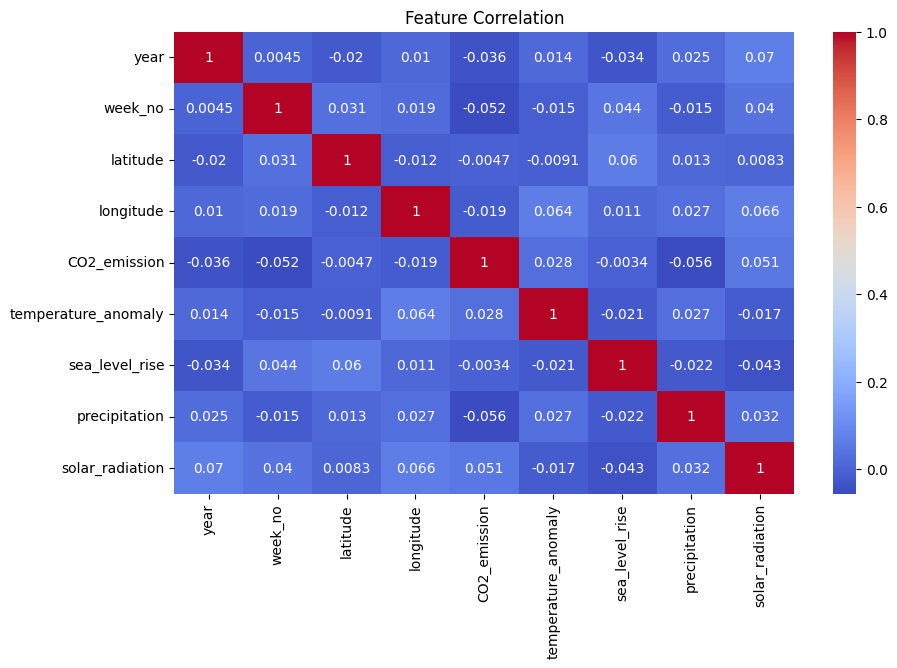

In [3]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [4]:
# Prepare data
X = df.drop('temperature_anomaly', axis=1)
y = df['temperature_anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
joblib.dump(model, '../models/trained_model.pkl')

['../models/trained_model.pkl']

In [7]:
# Evaluation
y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.3f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.3f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.3f}')

MAE: 0.160
MSE: 0.040
R2 Score: -0.037


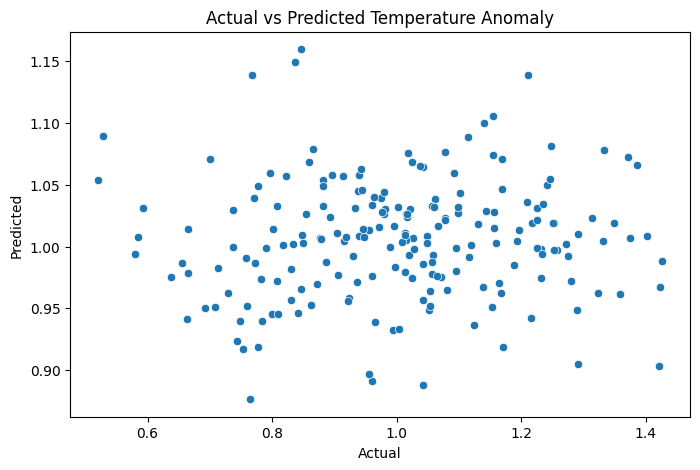

In [8]:
# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Temperature Anomaly")
plt.show()